# Análise Exploratória de Dados - Diamantes
**Projeto de Extensão:** Introdução à Ciência de Dados (ICD 2026)

**Autores:**
   - Gustavo Kim Alcantara (RA: 820763)
   - Enzo Dezem Alves (RA:801743)

---
## 1.1 Introdução e Definição do Dataset
Este projeto visa realizar uma análise exploratória sobre o dataset "Diamonds", contendo atributos de preço e qualidade de quase 54.000 diamantes.
**Link da base:** https://www.kaggle.com/datasets/zahranusrat/diamonds-characteristics-and-pricing-analysis





**Perguntas a serem respondidas**
   - 1 O tamanho do diamante tem relação com preço?
   - 2 Existem outliers que precisam ser removidos para não atrapalharem em uma futura modelagem?
   - 3 As variáveis numéricas apresentam simetria ou assimetria? Há caudas longas?
   - 4 depth e table influenciam o preço ou apenas o tamanho importa?

In [1]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações visuais
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Carregamento dos dados
try:
    df = pd.read_csv('data/diamonds.csv')
    print("Dataset carregado com sucesso!")
except FileNotFoundError:
    print("Erro: Arquivo 'diamonds.csv' não encontrado na pasta 'data'.")

# Exibição das primeiras linhas e informações gerais
display(df.head())
print("\n--- Informações dos Atributos ---")
df.info()

Dataset carregado com sucesso!


carat      cut color clarity  depth  table     x     y     z  price
0   0.23    Ideal     E     SI2   61.5   55.0  3.95  3.98  2.43    326
1   0.21  Premium     E     SI1   59.8   61.0  3.89  3.84  2.31    326
2   0.23     Good     E     VS1   56.9   65.0  4.05  4.07  2.31    327
3   0.29  Premium     I     VS2   62.4   58.0  4.20  4.23  2.63    334
4   0.31     Good     J     SI2   63.3   58.0  4.34  4.35  2.75    335


--- Informações dos Atributos ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   x        53940 non-null  float64
 7   y        53940 non-null  float64
 8   z        53940 non-null  float64
 9   price    53940 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [2]:
# Estatísticas descritivas iniciais
display(df.describe())

# Verificação de duplicatas
duplicatas = df.duplicated().sum()
print(f"\nQuantidade de linhas duplicadas: {duplicatas}")

# Verificação de valores nulos
nulos = df.isnull().sum()
print(f"\nQuantidade de valores nulos por coluna:\n{nulos}")

carat         depth         table             x             y  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184      5.731157      5.734526   
std        0.474011      1.432621      2.234491      1.121761      1.142135   
min        0.200000     43.000000     43.000000      0.000000      0.000000   
25%        0.400000     61.000000     56.000000      4.710000      4.720000   
50%        0.700000     61.800000     57.000000      5.700000      5.710000   
75%        1.040000     62.500000     59.000000      6.540000      6.540000   
max        5.010000     79.000000     95.000000     10.740000     58.900000   

                  z         price  
count  53940.000000  53940.000000  
mean       3.538734   3932.799722  
std        0.705699   3989.439738  
min        0.000000    326.000000  
25%        2.910000    950.000000  
50%        3.530000   2401.000000  
75%        4.040000   5324.250000  
max       31.800000  18823.000000


Quantidade de linhas duplicadas: 146

Quantidade de valores nulos por coluna:
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64


## 1.3 Análise Multivariada

Uma vez feitos os gráficos das analises uni variadas, vamos partir para análise multivariada , para tentar capturar relações entre variáveis.

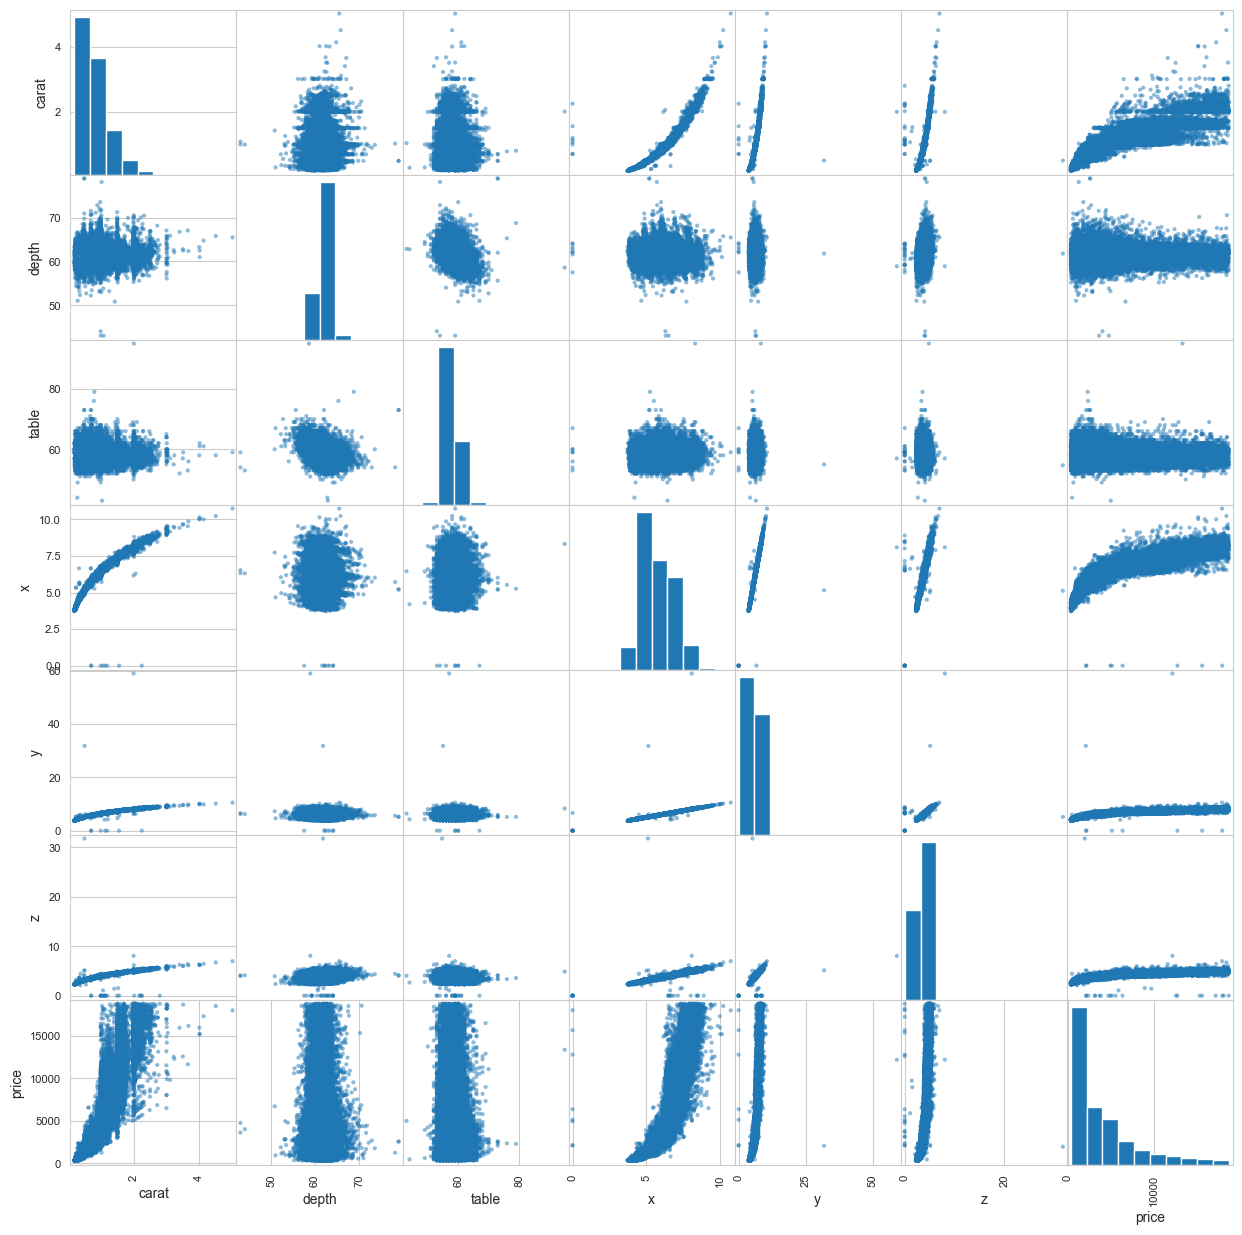

In [3]:
pd.plotting.scatter_matrix(df, figsize=(15, 15))
plt.show()

Como é possivel observar, existe algumas relações aparentemente lineares,  outras relações parecendo com a curva exponencial e outras que parecem não ter uma realação clara linear, para isso vamos partir para uma análise individual das fetueres com a variavel alvo **Price**.

Começando pelas **categóricas** que ainda não foram analisadas.

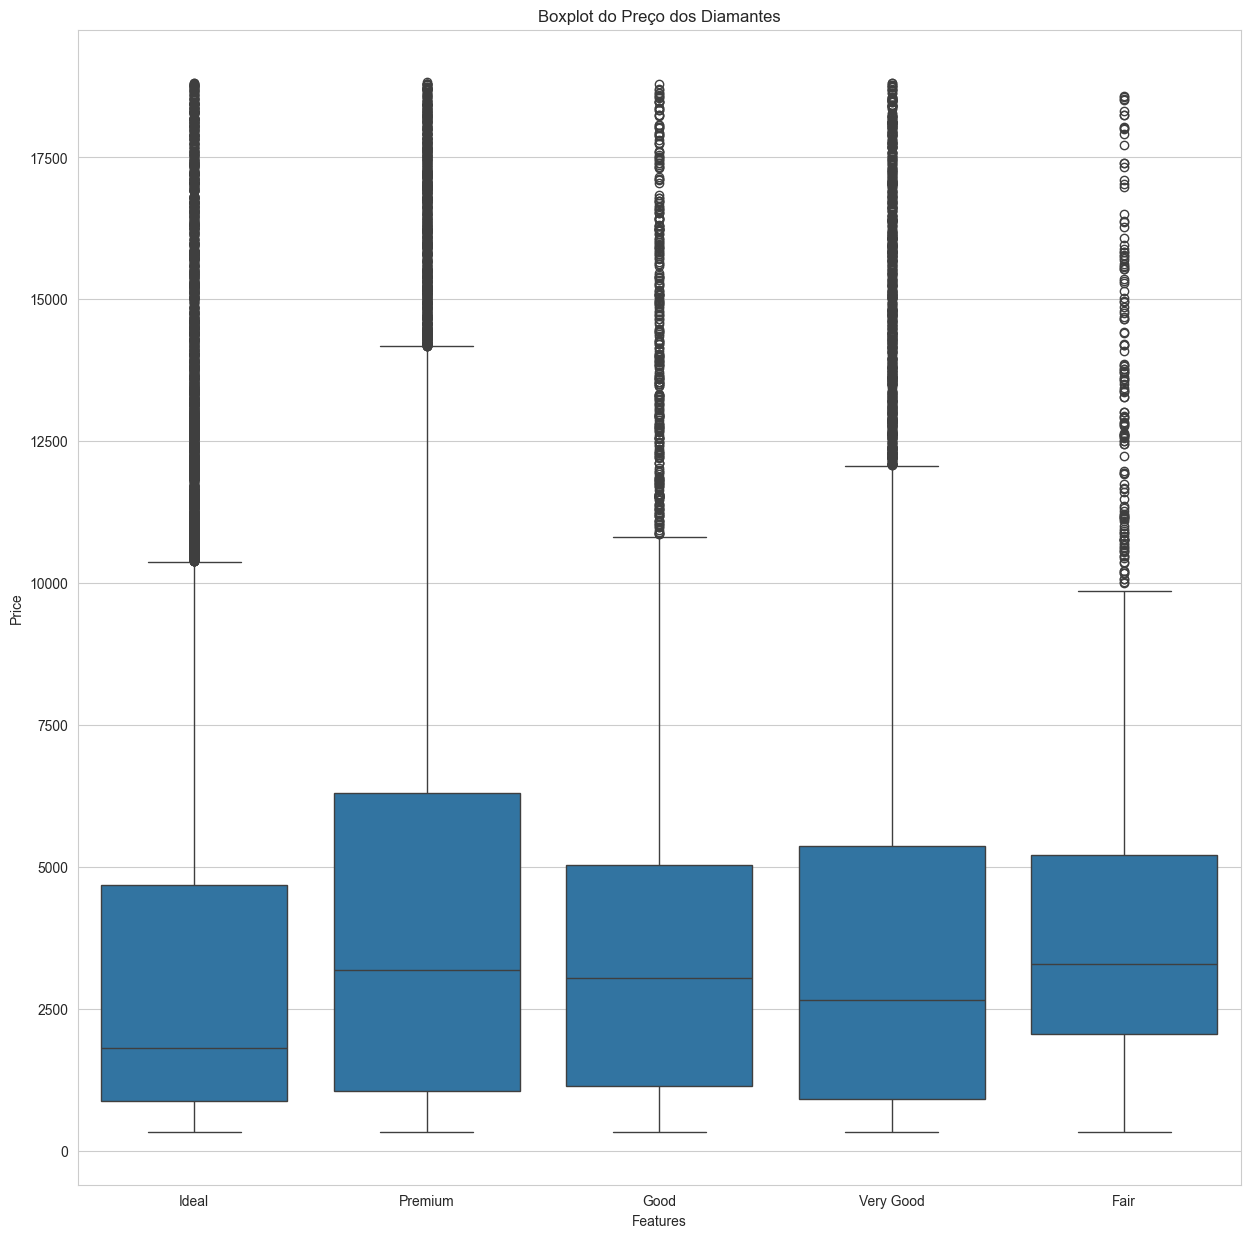

In [4]:
df_plot = df.copy()


plt.figure(figsize=(15,15))
sns.boxplot(data=df_plot, x="cut", y="price")
plt.title('Boxplot do Preço dos Diamantes')
plt.xlabel("Features")
plt.ylabel("Price")
plt.show()

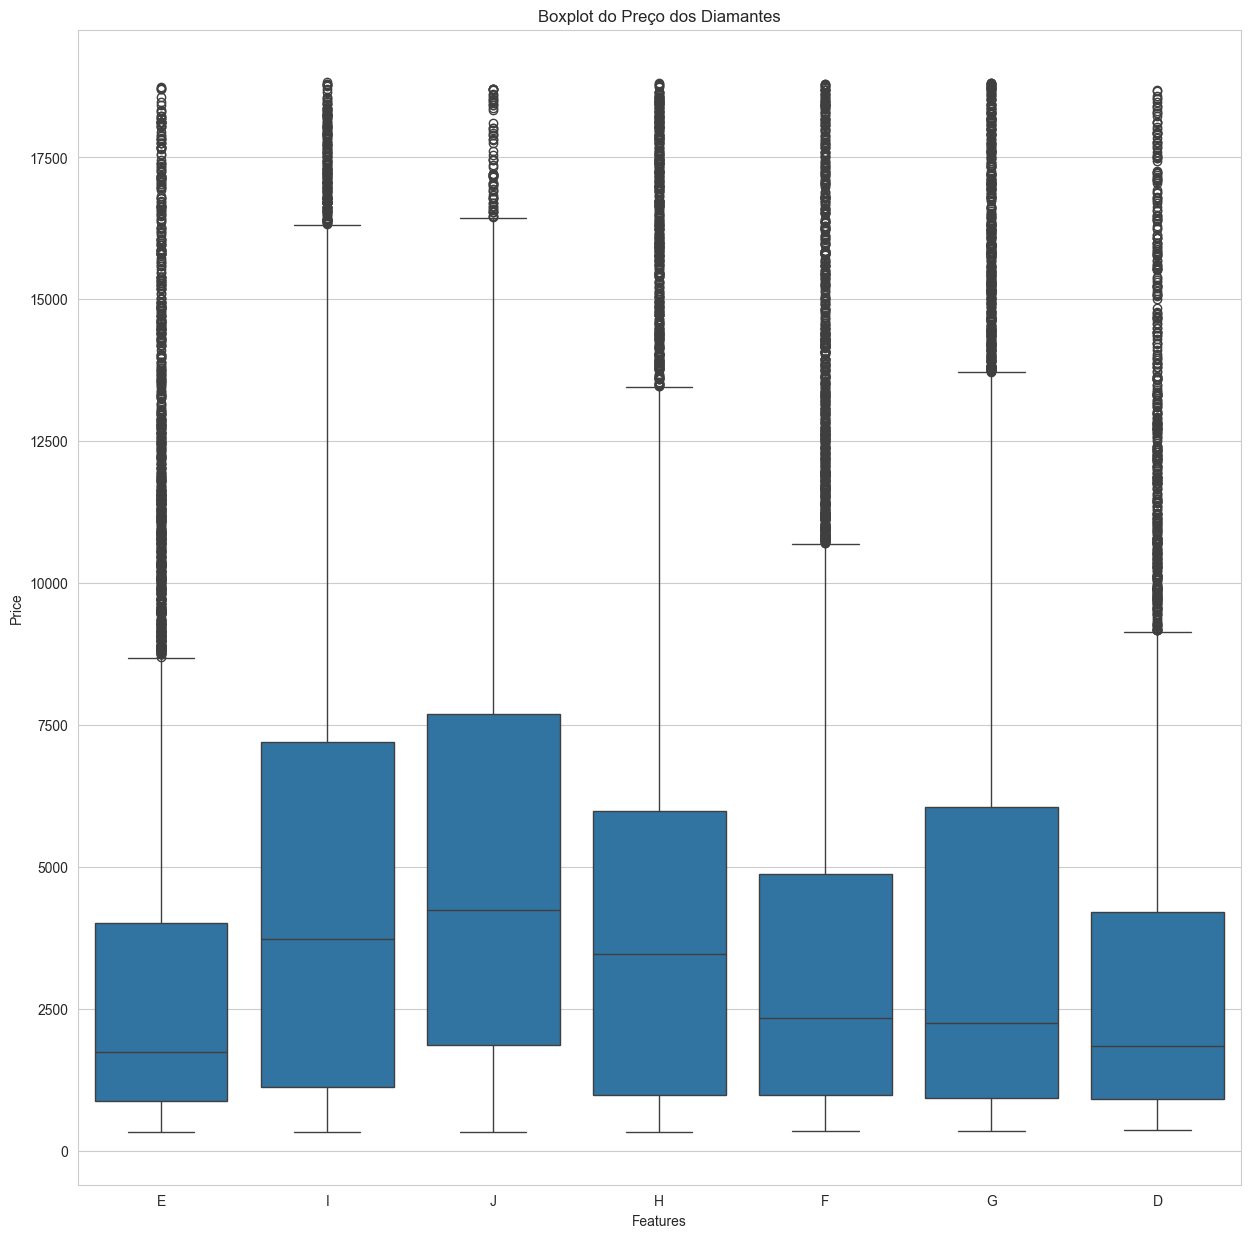

In [5]:
df_plot = df.copy()


plt.figure(figsize=(15,15))
sns.boxplot(data=df_plot, x="color", y="price")
plt.title('Boxplot do Preço dos Diamantes')
plt.xlabel("Features")
plt.ylabel("Price")
plt.show()

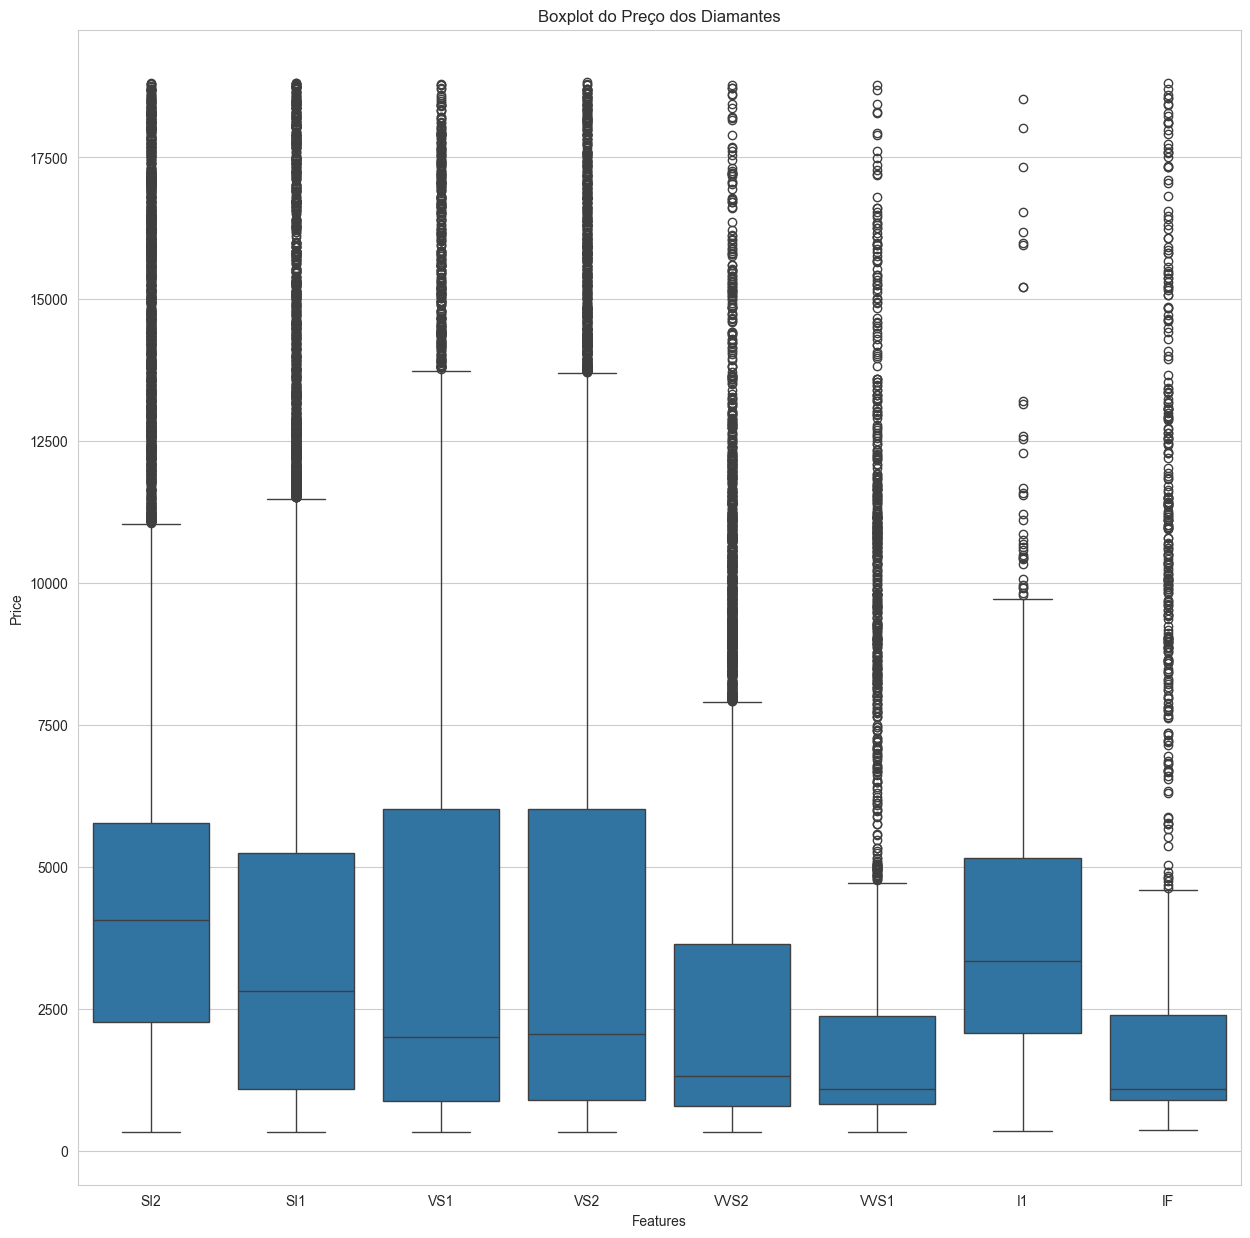

In [6]:
df_plot = df.copy()


plt.figure(figsize=(15,15))
sns.boxplot(data=df_plot, x="clarity", y="price")
plt.title('Boxplot do Preço dos Diamantes')
plt.xlabel("Features")
plt.ylabel("Price")
plt.show()


Como é possível observar, há a presença de diversos **outliers** nas distribuições. Isso pode ser problemático caso fosse treinado um modelo de machine learning, pois valores muito distantes do padrão podem distorcer o ajuste e prejudicar a capacidade de generalização.

Mais adiante, iremos investigar com mais cuidado a origem desses outliers e avaliar se faz sentido mantê-los ou removê-los do dataset. No entanto, uma possível explicação inicial é que essas variáveis, isoladamente, **não explicam bem o preço do diamante**.

Outro ponto importante é que, ao observar os boxplots, percebemos diferenças nas medianas entre categorias que, em princípio, não fazem sentido — por exemplo, categorias inferiores como *Premium* apresentando medianas maiores do que *Ideal*. Isso ocorre porque **o preço é fortemente dominado pelo peso (carat)**. Assim, se diamantes *Premium* forem, em média, maiores que os *Ideal*, eles naturalmente apresentarão preços mais altos, independentemente da qualidade do corte.



Agora partindo para uma análise das variáveis especificas numéricas

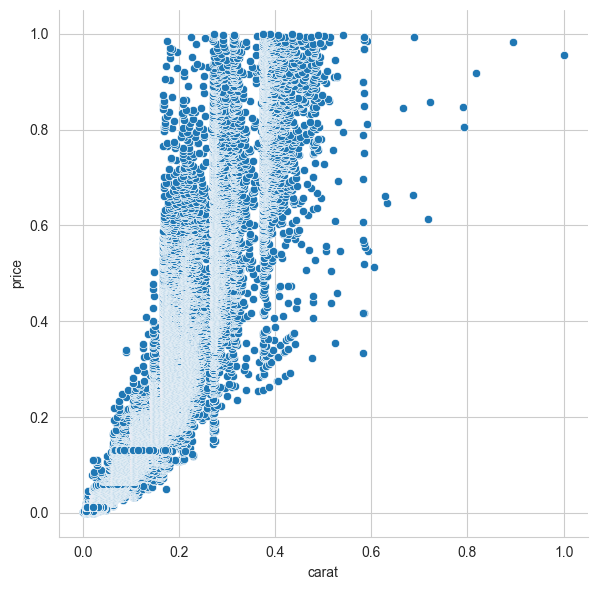

In [7]:
##Analise da relação entre atributos numéricos com a variavel alvo (price)
df_plot_num = df.select_dtypes(include=[np.number])

#normalização da variável alvo para melhor visualização
df_plot_num["price"] = (df_plot_num["price"] - df_plot_num["price"].min()) / (df_plot_num["price"].max() - df_plot_num["price"].min())

df_plot_num["carat"] = (df_plot_num["carat"] - df_plot_num["carat"].min()) / (df_plot_num["carat"].max() - df_plot_num["carat"].min())
sns.FacetGrid(df_plot_num, height=6).map(sns.scatterplot, "carat", "price").add_legend()

plt.show()

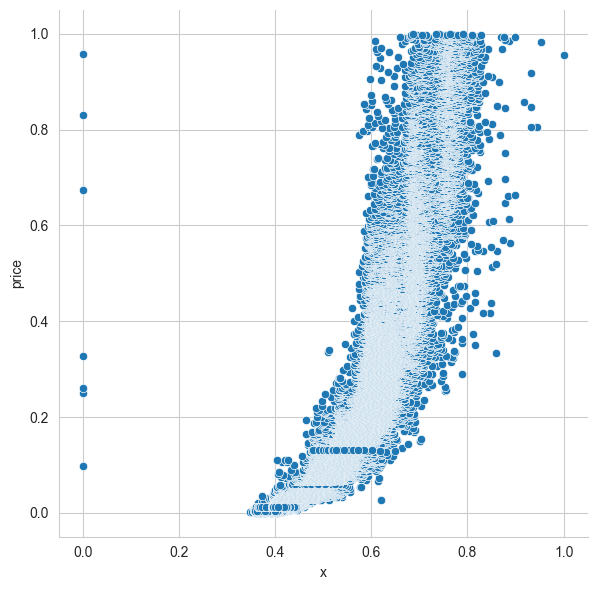

In [8]:


df_plot_num["x"] = (df_plot_num["x"] - df_plot_num["x"].min()) / (df_plot_num["x"].max() - df_plot_num["x"].min())
sns.FacetGrid(df_plot_num, height=6).map(sns.scatterplot, "x", "price").add_legend()

plt.show()

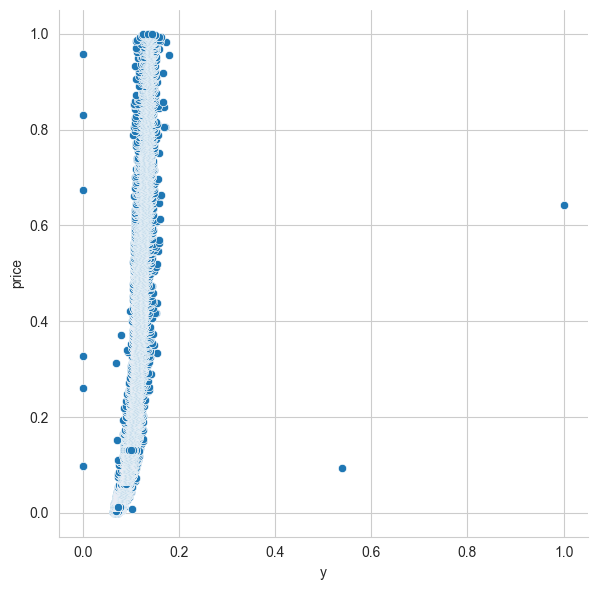

In [9]:
df_plot_num["y"] = (df_plot_num["y"] - df_plot_num["y"].min()) / (df_plot_num["y"].max() - df_plot_num["y"].min())
sns.FacetGrid(df_plot_num, height=6).map(sns.scatterplot, "y", "price").add_legend()

plt.show()

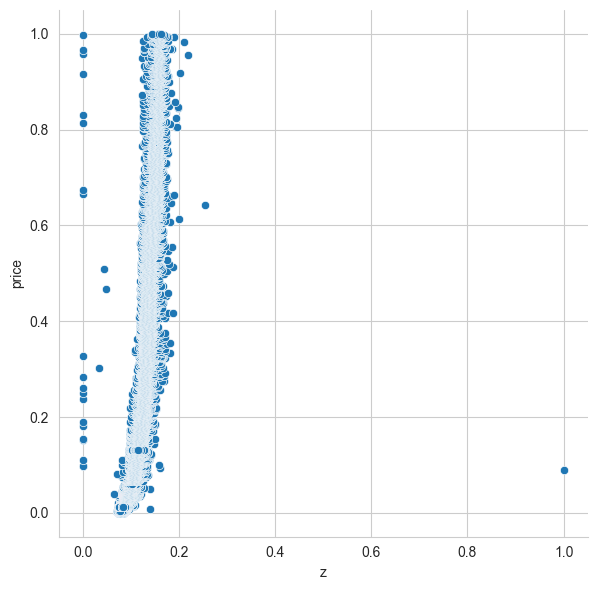

In [10]:
df_plot_num["z"] = (df_plot_num["z"] - df_plot_num["z"].min()) / (df_plot_num["z"].max() - df_plot_num["z"].min())
sns.FacetGrid(df_plot_num, height=6).map(sns.scatterplot, "z", "price").add_legend()

plt.show()

<Axes: xlabel='carat', ylabel='price'>

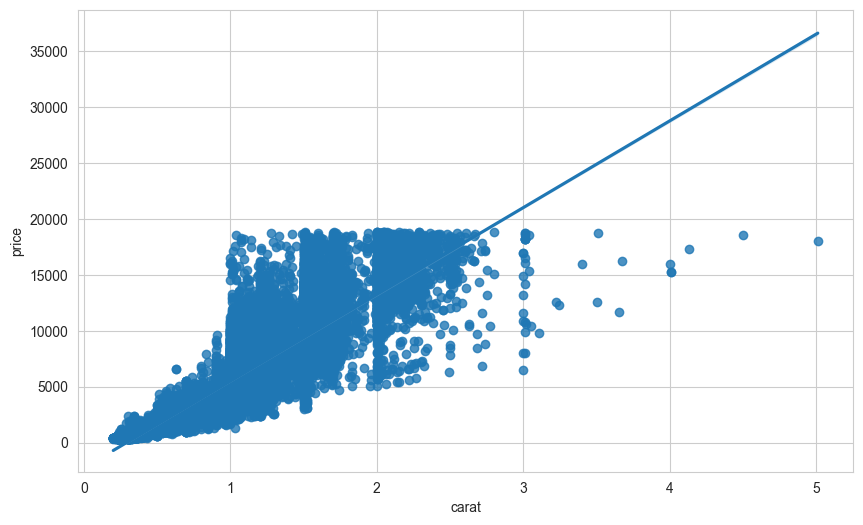

In [11]:
sns.regplot(data=df, x='carat', y='price')


Aparentemente essas relações com o tamanho do diamente são todas exponenciais, porem elas indicam uma alta correlação do aumento do tamanho do diamente ao aumento de preço do mesmo. 

Vamos analisar agora a correlação das várivaies numéricas do dataset

<Figure size 1200x1000 with 0 Axes>

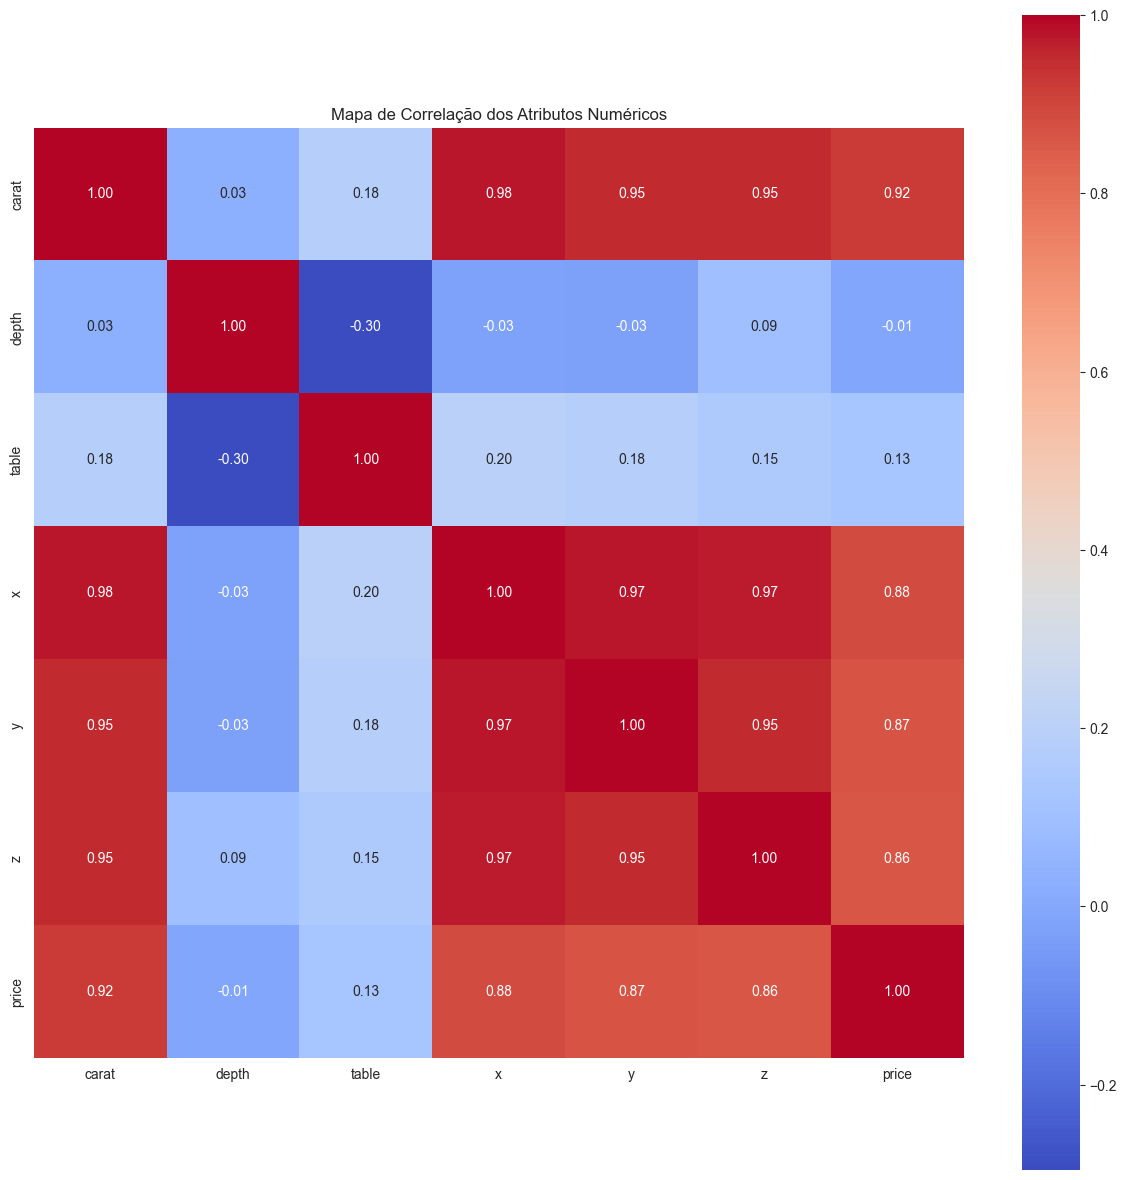

In [12]:
df_plot_num = df.select_dtypes(include=[np.number])

plt.figure(figsize=(12, 10))
corr = df_plot_num.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Mapa de Correlação dos Atributos Numéricos')
plt.show()

Como pode ser observado, temos variáveis extremamente correlacionadas com a variavel alvo **price**, tendo 4 variaveis com uma correlação **linear** de mais de 85% com a a mesma. E isso é explicavel , pois como pode se imaginar, quanto maior o diamente, maior o seu valor. **O que responde a nossa primeira pergunta**.

Porem é possivel observar, que essas variaveis , por indicarem o tamanho do diamente, estão muito correlacionadas entre si, o que pode em alguns modelos atrapalhar a previsão.

Então a correlação linear de depth e table com price **não é alta**, mas sera que exsite alguma relação não linear dessas variaveis? ou talvez alguma relação entre elas que possa ser util para a modelagem? 

<Axes: xlabel='depth', ylabel='table'>

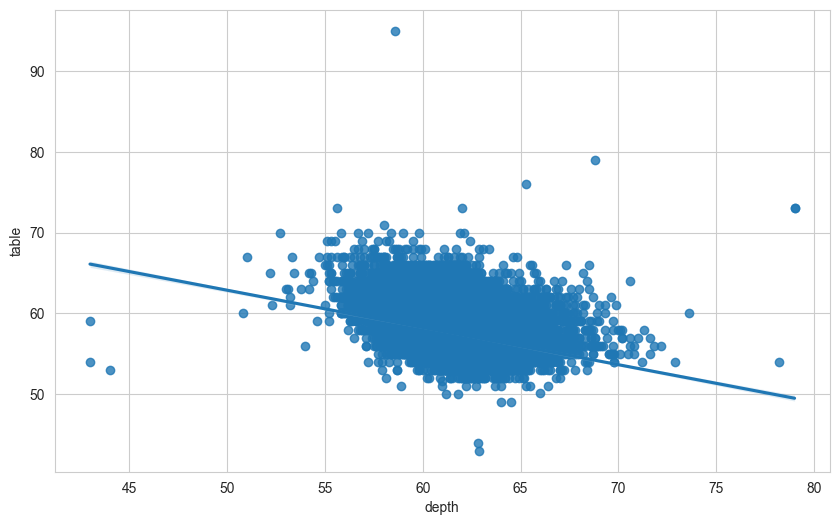

In [13]:
sns.regplot(data=df, x='depth', y='table')

aparentemente existe uma correlação negativa entre as variaveis, mas elas parecem bem agrupadas.Os dados aglomerados no centro indicam que a maioria dos diamantes segue padrões comerciais ideais de lapidação, com depth e table variando dentro de faixas estreitas. Esses atributos não exibem correlação linear forte entre si e provavelmente também têm pouca relação direta com o preço. Os pontos fora da nuvem central representam outliers (lapidações atípicas ou erros). Porem não podemos afirmar que são erros.

<Axes: xlabel='depth', ylabel='price'>

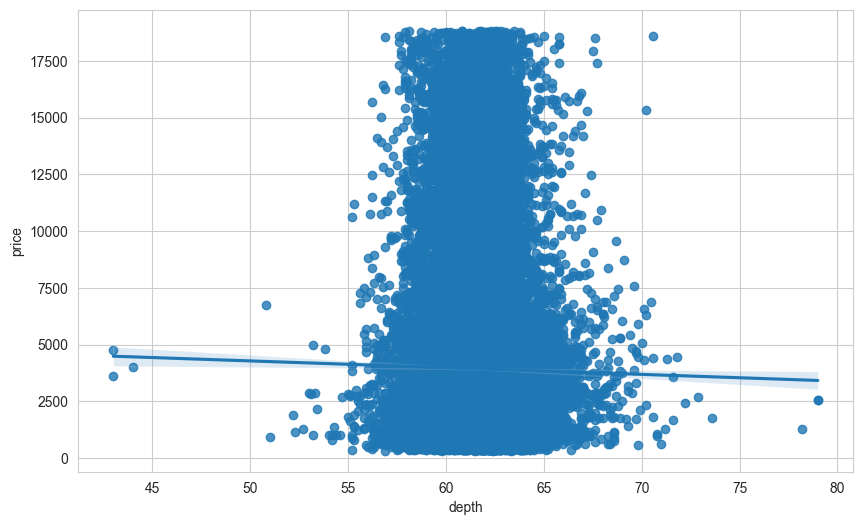

In [14]:
sns.regplot(data=df, x='depth', y='price')

<Axes: xlabel='table', ylabel='price'>

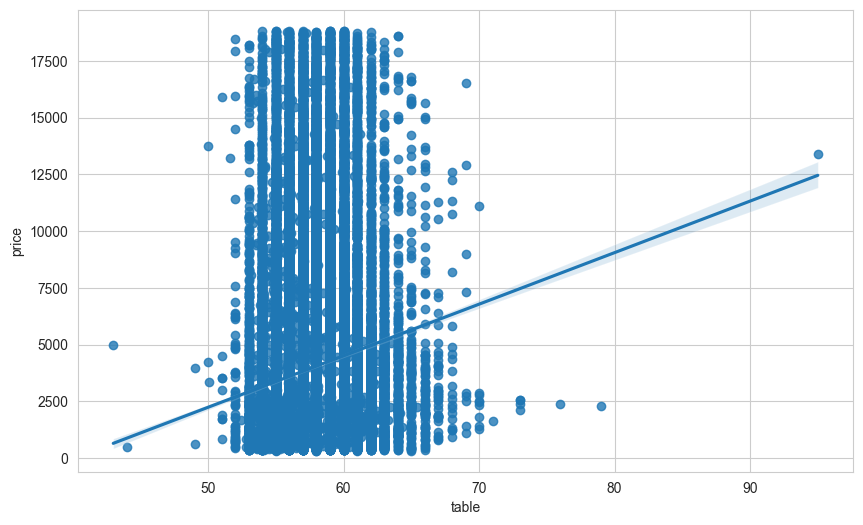

In [15]:
sns.regplot(data=df, x='table', y='price')

Como pode ser visto, a relação não é linear, o diamante mais valioso tem depth perto de 60 e para table perto de 60 tambem, e isso pode ser uma **variavel util** para nós.

## 1.4 Análise de outliers



Agora vamos para a análise de ***outliers***, alguns outliers podem fazer sentido, como um diamante extremamente raro por N razôes, porem as vezes temos dados com valores digitados erroneamente, e é trabalho do cientista de dados achar esses dados e diferenciar os casos, vamos começar retirando dados que claramente foram digitados erroneamente.

Caso o diamante tenha dimensões x,y,z = 0, claramente houve um erro de digitação e esse dado precisa ser retirado.

<Axes: xlabel='z', ylabel='price'>

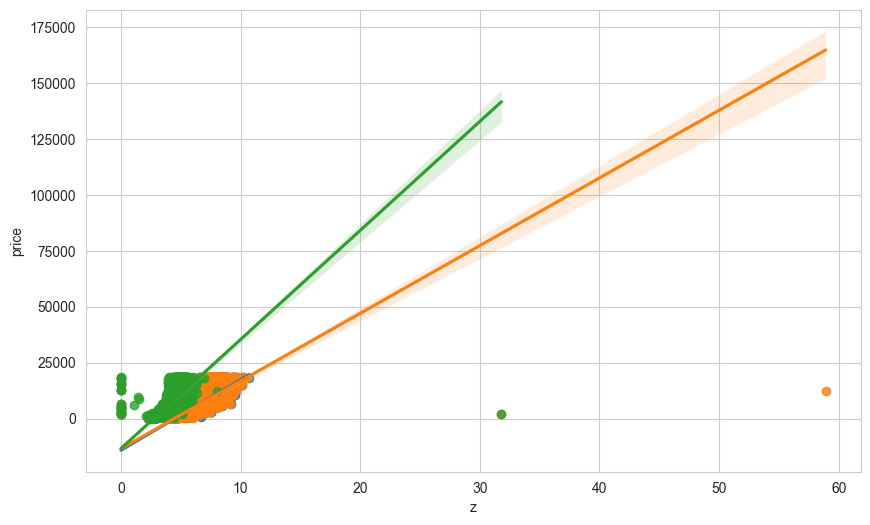

In [16]:
sns.regplot(data=df, x='x', y='price')
sns.regplot(data=df, x='y', y='price')
sns.regplot(data=df, x='z', y='price')


como é possivel ver, temos variaveis com x,y ou z = 0 e isso precisa ser tratado.

<Axes: xlabel='z', ylabel='price'>

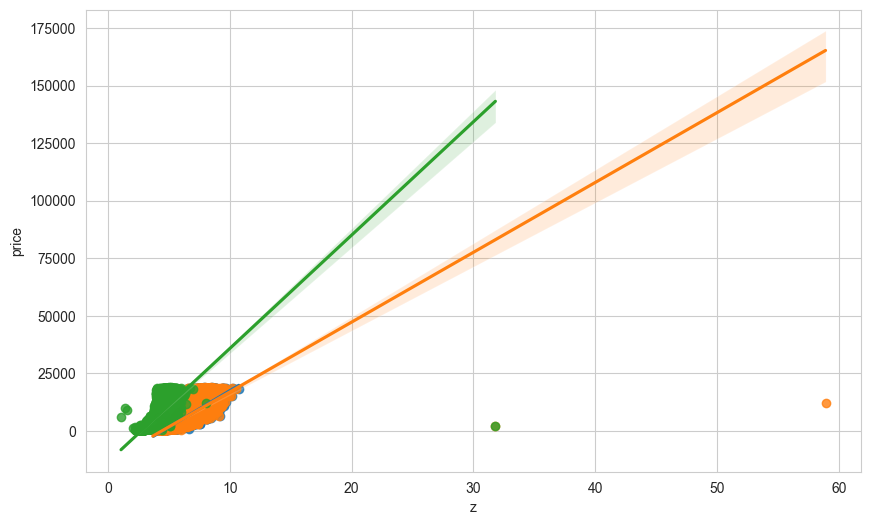

In [17]:
#removendo outliers com erro de digitação/medição

df = df[(df['x'] > 0) & (df['y'] > 0) & (df['z'] > 0)]

sns.regplot(data=df, x='x', y='price')
sns.regplot(data=df, x='y', y='price')
sns.regplot(data=df, x='z', y='price')

Como pode ser visto, os outliers por erro de digitação foram removidos, agora vamos limpar o dataset por outro aspecto. **E essa remoção responde a nossa segunda pergunta**.

Vamos removel tambem os x,y,x acima de 20mm , pois é matematicamente impossivel um diamente de menos de 5 carat ter essas medidas e nosso dataset é limitado a carat de 1 a 5 carat.

<Axes: xlabel='z', ylabel='price'>

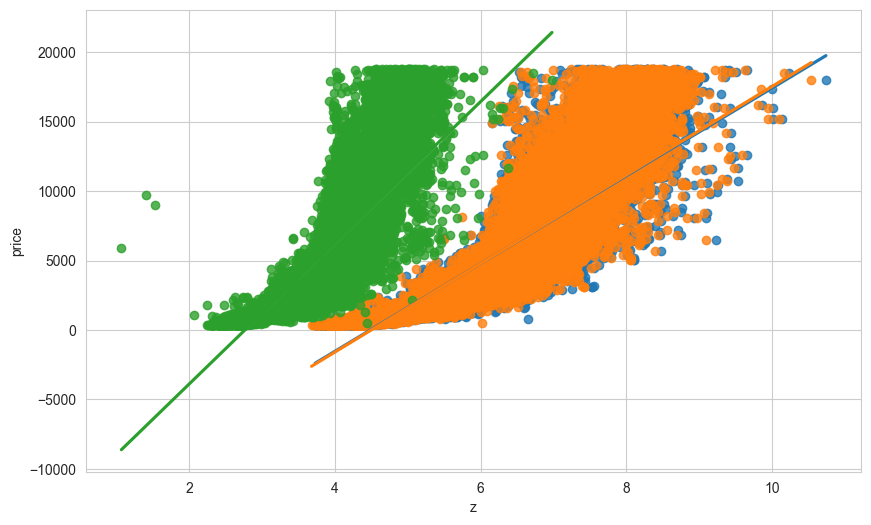

In [18]:
df = df[(df['x'] < 25) & (df["y"] < 25) & (df["z"] < 25)]

sns.regplot(data=df, x='x', y='price')
sns.regplot(data=df, x='y', y='price')
sns.regplot(data=df, x='z', y='price')

Como pode ser visto, a visualização do dados até melhorou após remoção desses outliers.

# Engenharia de Variáveis



Agora iremos partir para a formulação de varaiveis novas que podem talvez nos ajudar a fazer uma melhor modelagem do problema, para fazer uma previsão com mais acurácia, visto que claramente o preço do diamante depende de várias fatores.

Primeiramente vamos fazer variáveis novas relacionadas ao tamanho, pois ja vimos que o preço do diamante esta muito relacionado com esse aspecto. Portanto talvez novas variáveis nesse aspecto possam ajudar. Tambem vamos fazer variáveis tentando pegar o ponto ótimo de table e depth que vimos que é por padrão talvez no mundo dos diamantes mais valioso.

In [19]:
import numpy as np

# 1 — Geometria
df["volume"] = df["x"] * df["y"] * df["z"]
df["density"] = df["carat"] / df["volume"]
df["xy_ratio"] = df["x"] / df["y"]
df["xz_ratio"] = df["x"] / df["z"]
df["yz_ratio"] = df["y"] / df["z"]


# 2 — Lapidação
df["depth_dev"] = abs(df["depth"] - 61)
df["table_dev"] = abs(df["table"] - 57)

# 3 — Interações
df["volume_depth"] = df["volume"] * df["depth"]
df["volume_table"] = df["volume"] * df["table"]

# 4 — Polinomiais
df["carat2"] = df["carat"] ** 2
df["volume2"] = df["volume"] ** 2




* **`volume = x * y * z`**
  Aproxima o volume físico do diamante. Captura o “tamanho real” melhor do que apenas `carat`, já que usa as três dimensões medidas.

* **`density = carat / volume`**
  Relaciona o peso (carat) com o volume aproximado. Valores muito baixos ou muito altos podem indicar lapidação ineficiente ou medidas estranhas, funcionando como sinal de possíveis outliers ou cortes pouco usuais.

* **`xy_ratio`, `xz_ratio`, `yz_ratio`**
  São razões entre as dimensões físicas. Essas proporções ajudam a capturar o **formato** do diamante (mais “achatado”, mais “alto”, mais alongado). Formatos muito fora do padrão podem impactar a percepção de qualidade e, consequentemente, o preço.

---


* A literatura de gemologia aponta faixas consideradas “ideais” para:

  * **`depth ≈ 61%`**
  * **`table ≈ 57%`**

* **`depth_dev = |depth - 61|`**
  Mede o desvio da profundidade em relação ao valor ideal. Quanto maior o desvio, maior a chance de o diamante ter uma lapidação menos eficiente.

* **`table_dev = |table - 57|`**
  Mesmo raciocínio para a tabela. Esses dois atributos medem “quão fora do ideal” a lapidação está, o que pode ajudar o modelo a penalizar diamantes com proporções ruins.

---



* **`volume_depth = volume * depth`**
* **`volume_table = volume * table`**

Essas variáveis combinam **tamanho** com **proporções de lapidação**. A ideia é permitir que o modelo capture efeitos como:

> “Um depth ruim em diamantes grandes prejudica mais o preço do que em diamantes pequenos.”

Modelos baseados em árvore (como o LGBM) se beneficiam bastante dessas interações explícitas.

---



* **`carat2 = carat²`**
* **`volume2 = volume²`**

Preço vs carat (e vs volume)  não é linear — aumenta de forma acelerada para diamantes maiores. Esses termos quadráticos ajudam o modelo a capturar essa **não-linearidade** de maneira mais rica.








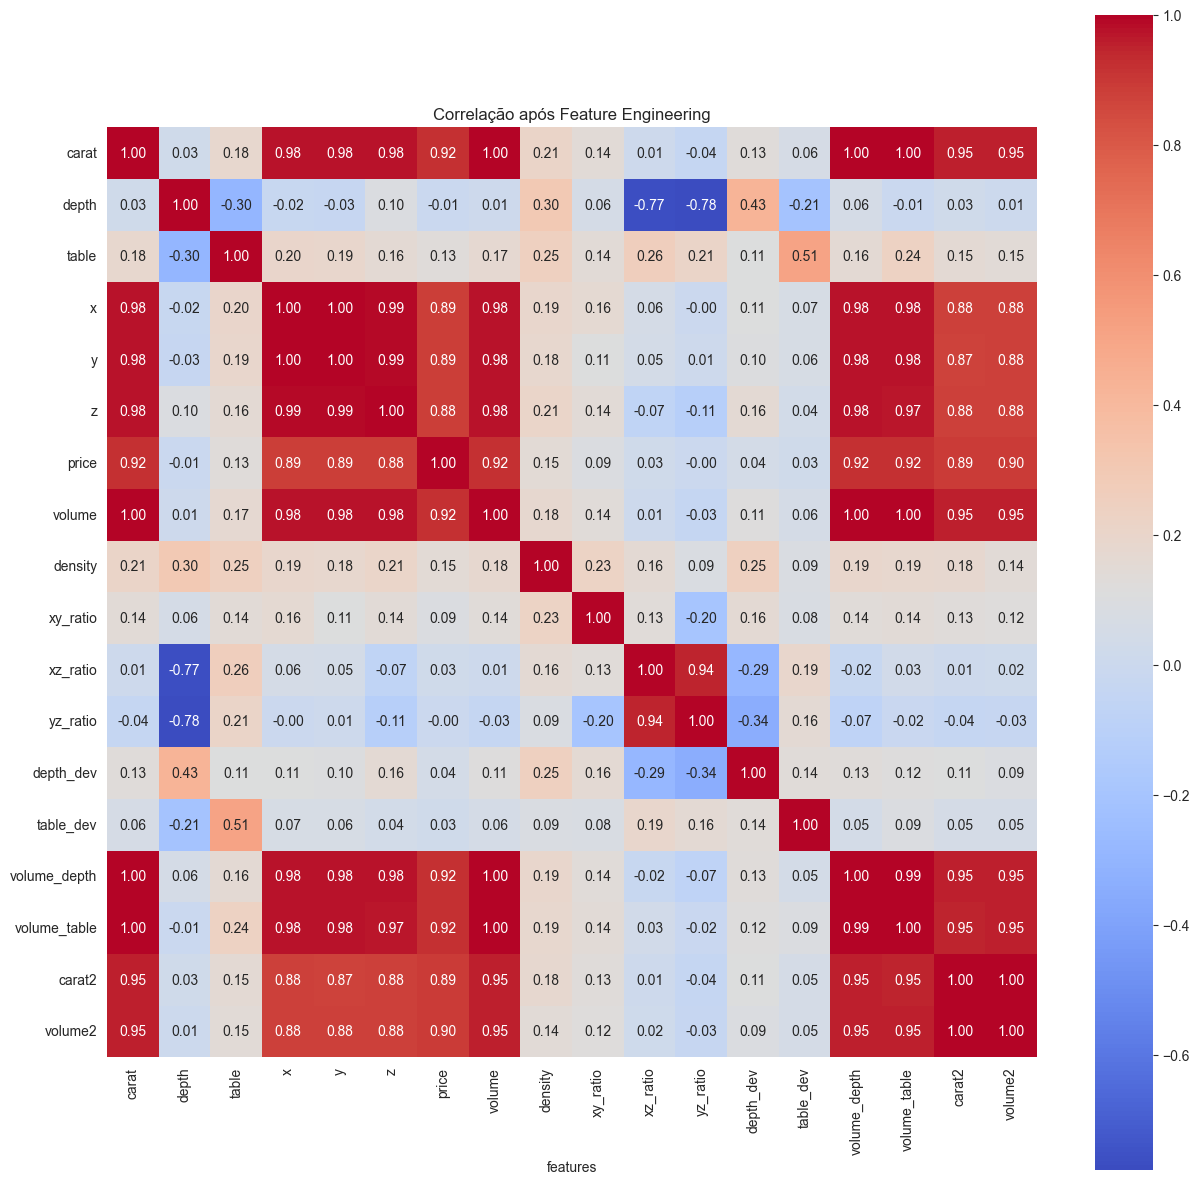

In [20]:
df_plot = df.copy()

df_plot = df_plot.select_dtypes(include=[np.number])

corr = df_plot.corr()

plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlação após Feature Engineering")
plt.xlabel("features")
plt.show()

aparentemente nossas variáveis em relação ao tamanho foram positivas para o dataset e nossas variáveis sobre depth e table novas não foram, porem isso só consegue ser medido após treinar o modelo de fato e vizualizar isso. Pois essa função corr, mede apenas relações lineares.

## 2.1 Treinando um modelo leve (LGBM) e medindo a ajuda das variáveis por meio do sharp.

In [21]:
#transformando de object para category


df["cut"] = df["cut"].astype("category")
df["color"] = df["color"].astype("category")
df["clarity"] = df["clarity"].astype("category")


In [22]:
from sklearn.model_selection import train_test_split


#separando variáveis em treino e teste, sem validação neste momento

X = df.drop(columns=["price"])
y = df["price"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [23]:
from lightgbm import LGBMRegressor

model = LGBMRegressor(
    objective="regression",
    boosting_type="gbdt",
    random_state=42
)


In [24]:
import lightgbm as lgb
print(lgb.__version__)


4.6.0


In [25]:
param_dist = {
    "num_leaves": [20, 40, 80, 120],
    "max_depth": [ 5, 7, 9, 11],
    "learning_rate": [0.01, 0.05, 0.1],
    "n_estimators": [300, 500, 1500],
    "min_child_samples": [5, 10, 20],
    "subsample": [0.6, 0.7, 1.0],
    "colsample_bytree": [0.6, 0.7, 1.0],
    "reg_alpha": [ 0.1, 0.3, 0.5],
    "reg_lambda": [ 0.1, 0.3, 0.7]
}

In [26]:
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=40,                   # número de combinações testadas
    scoring="neg_mean_absolute_error",
    cv=3,
    verbose=0,
    random_state=42,
    n_jobs=1
)

random_search.fit(X_train, y_train)


best_model = random_search.best_estimator_
print(random_search.best_params_)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000887 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3663
[LightGBM] [Info] Number of data points in the train set: 28755, number of used features: 20
[LightGBM] [Info] Start training from score 3947.760529
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

c:\Users\enzod\Desktop\Projeto_panda\Panda-Project\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


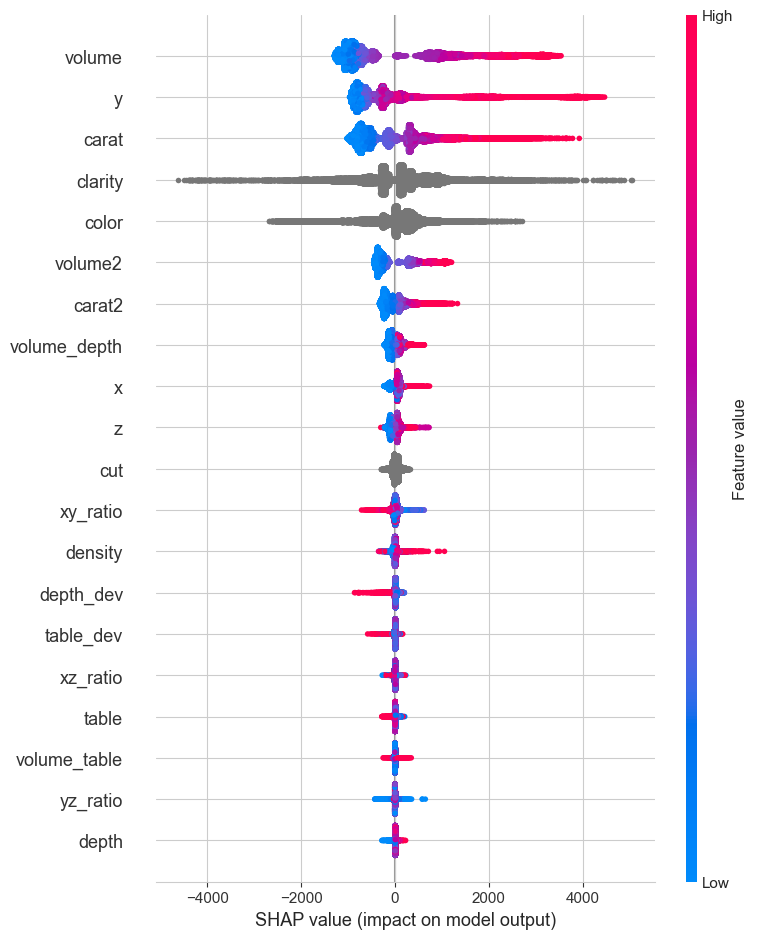

Melhores variaveis em ordem


In [ ]:
import shap

explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train)



In [29]:
print("Melhores variaveis em ordem")

# obter array de shap (tratando caso shap_values seja lista)
shap_vals = shap_values
if isinstance(shap_vals, list):
    shap_vals = shap_vals[0]

# calcula mean absolute shap por feature
mean_abs_shap = np.abs(shap_vals).mean(axis=0)

feat_imp = pd.DataFrame({
    'feature': X_train.columns,
    'mean_abs_shap': mean_abs_shap
}).sort_values('mean_abs_shap', ascending=False)

print("Melhores variáveis em ordem (SHAP mean |abs|):")
print(feat_imp.head(20).to_string(index=False))

# lista apenas os nomes (opcional)
top_features = feat_imp['feature'].head(20).tolist()
print("\\nTop features:", top_features)



Melhores variaveis em ordem
Melhores variáveis em ordem (SHAP mean |abs|):
     feature  mean_abs_shap
      volume    1102.308873
           y     748.317431
       carat     676.960873
     clarity     600.751611
       color     405.590299
     volume2     388.951201
      carat2     224.035542
volume_depth     118.407126
           x      80.810724
           z      79.779817
         cut      67.242634
    xy_ratio      42.874848
     density      26.569115
   depth_dev      22.346387
   table_dev      11.478136
    xz_ratio      10.863123
       table      10.631970
volume_table       9.373650
    yz_ratio       7.999704
       depth       7.825506
\nTop features: ['volume', 'y', 'carat', 'clarity', 'color', 'volume2', 'carat2', 'volume_depth', 'x', 'z', 'cut', 'xy_ratio', 'density', 'depth_dev', 'table_dev', 'xz_ratio', 'table', 'volume_table', 'yz_ratio', 'depth']


## 2.2 métricas de avaliação

In [31]:
from sklearn.metrics import mean_absolute_error, r2_score

pred = best_model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, pred))
print("R2:", r2_score(y_test, pred))


MAE: 255.5673533226954
R2: 0.9837153378551878


In [32]:
import numpy as np

def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


In [33]:
from sklearn.metrics import mean_absolute_error, r2_score

# Previsões
y_pred_train = best_model.predict(X_train)
y_pred_test  = best_model.predict(X_test)

# Métricas
mae_train  = mean_absolute_error(y_train, y_pred_train)
mae_test   = mean_absolute_error(y_test, y_pred_test)

mape_train = mape(y_train, y_pred_train)
mape_test  = mape(y_test, y_pred_test)

r2_train   = r2_score(y_train, y_pred_train)
r2_test    = r2_score(y_test, y_pred_test)

print("=== Treino ===")
print(f"MAE:  {mae_train:.2f}")
print(f"MAPE: {mape_train:.2f}%")
print(f"R²:   {r2_train:.4f}")

print("\n=== Teste ===")
print(f"MAE:  {mae_test:.2f}")
print(f"MAPE: {mape_test:.2f}%")
print(f"R²:   {r2_test:.4f}")


=== Treino ===
MAE:  203.90
MAPE: 5.66%
R²:   0.9918

=== Teste ===
MAE:  255.57
MAPE: 6.32%
R²:   0.9837


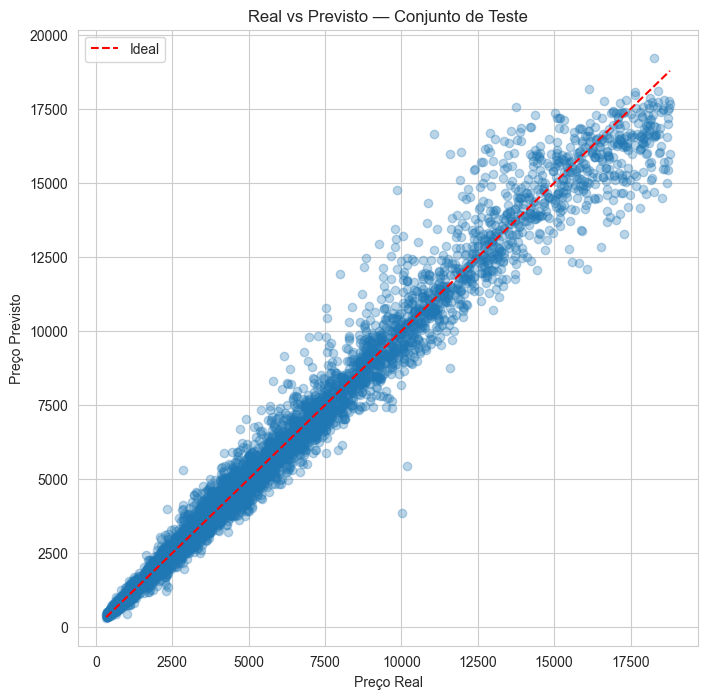

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))

plt.scatter(y_test, y_pred_test, alpha=0.3)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         "r--", label="Ideal")

plt.xlabel("Preço Real")
plt.ylabel("Preço Previsto")
plt.title("Real vs Previsto — Conjunto de Teste")
plt.legend()
plt.grid(True)
plt.show()
